# K-Means Clustering

**a. konsumen/pembeli:**
- tingkat pendapatan -> output: company bisa menentukan jenis promo yang tepat, estimasi belanja, estimasi revenue, strategi pricing
- demografi (usia) -> output: company bisa mengetahui 'need' konsumen
- geografi (domisili) --> output: strategi pricing karena ada perbedaan biaya pengiriman, strategi iklan, strategi distribusi

**b. karyawan:**
- usia -> output: --> fasilitas kesehatan supaya karyawan bekerja optimal
- KPI --> output: --> manajemen bonus, motivasi, training
- Lama bekerja --> output: --> fasilitas/penghargaan
- jarak rumah ke kantor --> output: --> kedisiplinan, kinerja & kebugaran
- pendidikan --> output: --> manajemen gaji, staffing, skill

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them.

<img src='image_skssk\clus1_img.png' width='650'>

Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.

<img src='image_skssk\clus2_img.png' width='650'>

Such problems, without any fixed target variable, are known as unsupervised learning problems. In these problems, we only have the independent variables and no target/dependent variable.

In clustering, we do not have a target to predict. We look at the data and then try to club similar observations and form different groups. Hence it is an unsupervised learning problem.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Why Clustering ?**
Clustering is very much important as it determines the intrinsic grouping among the unlabeled data present. There are no criteria for a good clustering. It depends on the user, what is the criteria they may use which satisfy their need.

For instance, we could be interested in finding representatives for homogeneous groups (data reduction), in finding “natural clusters” and describe their unknown properties (“natural” data types), in finding useful and suitable groupings (“useful” data classes) or in finding unusual data objects (outlier detection).

This algorithm must make some assumptions which constitute the similarity of points and each assumption make different and equally valid clusters.

**K-means** is one of the simplest unsupervised learning algorithms that solve the clustering problems. The procedure follows a simple and easy way to classify a given data set through a certain number of clusters (assume k clusters). The main idea is to define k centers, one for each cluster.

<img src='image_skssk\clus3_img.gif' width='650'>

## K-Means is applied in
The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data and to find patterns and make better decisions.. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the most relevant group.

- Customer Profiling:
- Market segmentation,
- Computer vision
- Geo-statistics
- Astronomy

<img src='image_skssk\clus4_img.png' width='350'>


## Algorithm
To start with k-means algorithm, you first have to randomly initialize points called the cluster centroids (K). K-means is an iterative algorithm and it does two steps: 
1. Cluster assignment 
2. Move centroid step.

<img src='image_skssk\modelmodel_img.png' width='400'>

### 1. Cluster assignment

The algorithm goes through each of the data points and depending on which cluster is closer. It assigns the data points to one of the three cluster centroids.

### 2. Move centroid

Here, K-means moves the centroids to the average of the points in a cluster. In other words, the algorithm calculates the average of all the points in a cluster and moves the centroid to that average location.

This process is repeated until there is no change in the clusters (or possibly until some other stopping condition is met). K is chosen randomly or by giving specific initial starting points by the user.

<img src='image_skssk\modell_img.png' width='600'>

## How to select the best K

The algorithm clusters the data into k clusters, even if k is not the right number of clusters to use. Therefore, when using k-means clustering, users need some way to determine whether they are using the right number of clusters.

One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE).

<img src='image_skssk\elbow_img.png' width='500'>


Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the “elbow” on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster).

## Mall Customer Segmentation

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [65]:
data = pd.read_csv(r'C:\Users\HP.LAPTOP-5BTBEJFV\Documents\data science\SHIFTACADEMY\Bahan Ajar\SKSSK\Data\Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Visualization

C:\Users\HP.LAPTOP-5BTBEJFV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP.LAPTOP-5BTBEJFV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP.LAPTOP-5BTBEJFV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

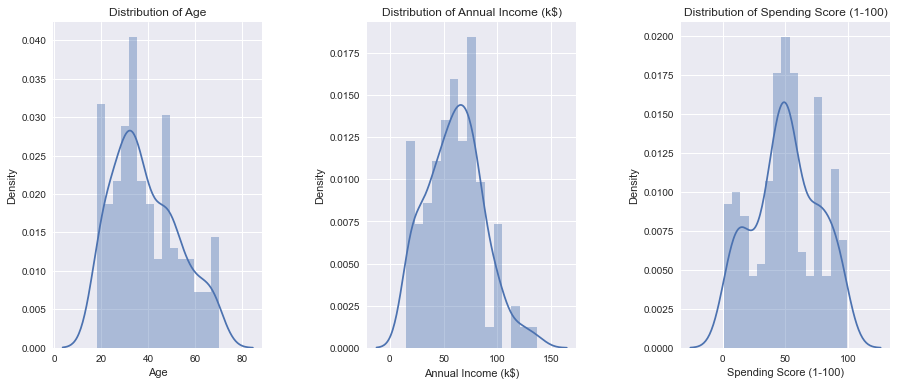

In [5]:
plt.style.use('seaborn')
plt.figure(figsize=(15,6))

n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(data[x], bins = 15)
    plt.title(f'Distribution of {x}')
plt.show()

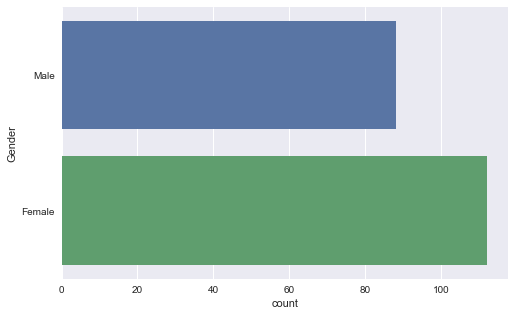

In [6]:

plt.figure(figsize=(8,5))
sns.countplot(y = 'Gender', data = data)
plt.show()

## Encode Gender Feature

In [7]:
df = data.copy()

In [8]:
df['Gender_Bin'] = LabelEncoder().fit_transform(df[['Gender']])
df = df.drop(['Gender'], axis = 1)

C:\Users\HP.LAPTOP-5BTBEJFV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Rename

In [9]:
df.rename(columns = {'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace = True)

In [10]:
df.head()


,CustomerID,Age,Annual_Income,Spending_Score,Gender_Bin
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


## Counting The Best Value of K For K-Means Clustering Model

Untuk mengaplikasikan K-Means clustering kita perlu menentukan nilai k (jumlah clusternya). Ada beberapa metode untuk menentukan jumlah kluster:

**1. Elbow Method**

**2. Average Silhouette Method**

**3. Gap Statistic Method**"

Dalam penentuan jumlah kluster kali ini, metode yang digunakan yaitu Elbow Method. Elbow Method secara sederhana menentukan jumlah optimal kluster (optimal cluster number) dilihat dari optimal inertia. Melihat optimal inertia dapat dibuat grafik berikut ini. Nilai kluster optimal ada di bagian siku grafik inertia.

In [11]:
k = range(1, 10)
inertia = []

for i in k:
    model = KMeans(n_clusters = i) # jumlah cluster akan dilooping dalam range (1 - 10)
    model.fit(df[['Age', 'Annual_Income', 'Spending_Score', 'Gender_Bin']])
    inertia.append(model.inertia_)

print(k)
print(inertia)

range(1, 10)
[308862.06000000006, 212889.44245524294, 143391.59236035674, 104414.67534220174, 75528.58656469136, 58350.65449462816, 51132.70321257687, 44391.82080487078, 40671.105734979334]


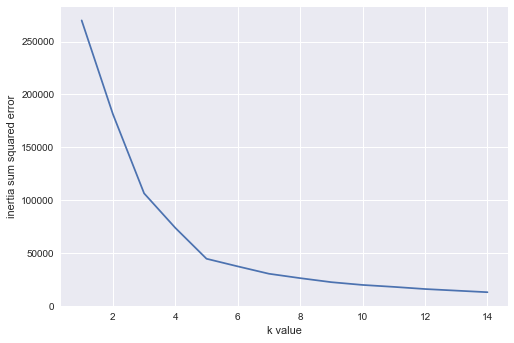

In [66]:
plt.plot(k, inertia) # untuk melihat pada sikut dalam plot
plt.xlabel('k value')
plt.ylabel('inertia sum squared error')
plt.show()


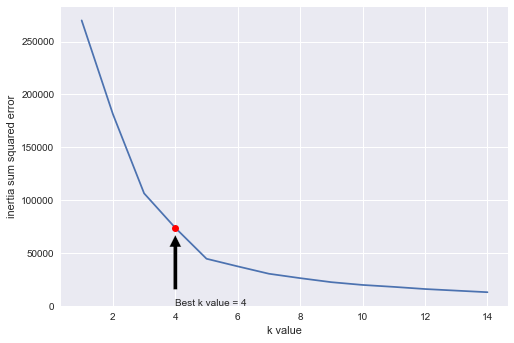

In [67]:

plt.plot(k, inertia) # untuk melihat pada sikut dalam plot
plt.xlabel('k value')
plt.ylabel('inertia sum squared error')

#memberi keterangan
plt.plot(k[3], inertia[3], 'ro')
plt.annotate(
    'Best k value = 4',
    xy=(k[3], inertia[3]),
    xytext = (4, 30), arrowprops = dict(facecolor = 'black', shrink=0.1)
)
plt.show()

## Fitting KMeans Model

In [68]:
model_KM = KMeans(n_clusters = 4, max_iter = 1000)
model_KM.fit(df[['Age', 'Annual_Income', 'Spending_Score', 'Gender_Bin']])

KMeans(max_iter=1000, n_clusters=4)

In [69]:
# mengetahui hasil pengelompokkan
model_KM.labels_

array([2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

## Predict Cluster

In [70]:
df['cluster'] = model_KM.predict(df[['Age', 'Annual_Income', 'Spending_Score', 'Gender_Bin']])
df.head()

,CustomerID,Age,Annual_Income,Spending_Score,Gender_Bin,cluster,Cluster2
0,1,19,15,39,1,2,3
1,2,21,15,81,1,2,0
2,3,20,16,6,0,3,3
3,4,23,16,77,0,2,0
4,5,31,17,40,0,3,3


In [22]:
# mengetahui posisi centroids
model_KM.cluster_centers_

array([[44.89473684, 48.70526316, 42.63157895,  0.37894737],
       [32.69230769, 86.53846154, 82.12820513,  0.46153846],
       [24.82142857, 28.71428571, 74.25      ,  0.5       ],
       [40.39473684, 87.        , 18.63157895,  0.52631579]])

## Plotting Cluster 
**a. Age and Annual Income**



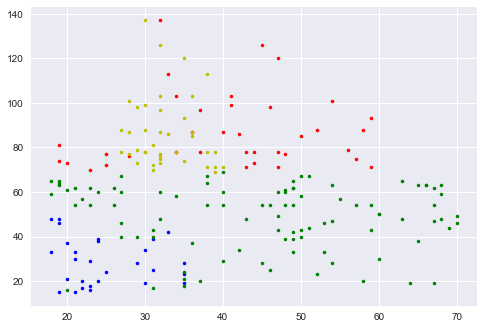

In [71]:
plt.plot(df['Age'][df['cluster'] == 0], df['Annual_Income'][df['cluster'] == 0], 'r.')
plt.plot(df['Age'][df['cluster'] == 1], df['Annual_Income'][df['cluster'] == 1], 'y.')
plt.plot(df['Age'][df['cluster'] == 2], df['Annual_Income'][df['cluster'] == 2], 'b.')
plt.plot(df['Age'][df['cluster'] == 3], df['Annual_Income'][df['cluster'] == 3], 'g.')

## b. Age & Spending Score

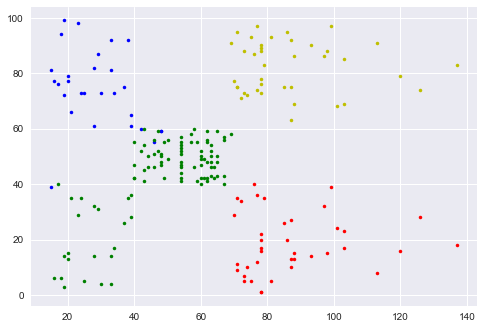

In [76]:
plt.plot(df['Annual_Income'][df['cluster'] == 0], df['Spending_Score'][df['cluster'] == 0], 'r.')
plt.plot(df['Annual_Income'][df['cluster'] == 1], df['Spending_Score'][df['cluster'] == 1], 'y.')
plt.plot(df['Annual_Income'][df['cluster'] == 2], df['Spending_Score'][df['cluster'] == 2], 'b.')
plt.plot(df['Annual_Income'][df['cluster'] == 3], df['Spending_Score'][df['cluster'] == 3], 'g.')

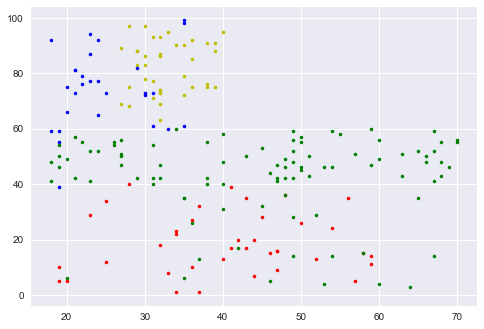

In [72]:
plt.plot(df['Age'][df['cluster'] == 0], df['Spending_Score'][df['cluster'] == 0], 'r.')
plt.plot(df['Age'][df['cluster'] == 1], df['Spending_Score'][df['cluster'] == 1], 'y.')
plt.plot(df['Age'][df['cluster'] == 2], df['Spending_Score'][df['cluster'] == 2], 'b.')
plt.plot(df['Age'][df['cluster'] == 3], df['Spending_Score'][df['cluster'] == 3], 'g.')

## c. Gender and Annual Income

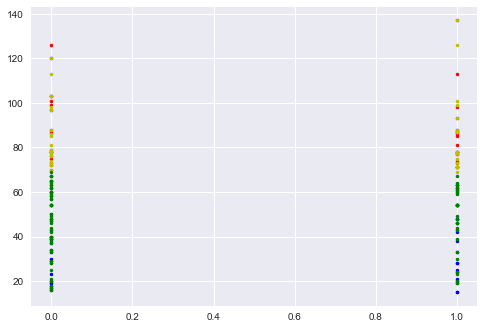

In [73]:

plt.plot(df['Gender_Bin'][df['cluster'] == 0], df['Annual_Income'][df['cluster'] == 0], 'r.')
plt.plot(df['Gender_Bin'][df['cluster'] == 1], df['Annual_Income'][df['cluster'] == 1], 'y.')
plt.plot(df['Gender_Bin'][df['cluster'] == 2], df['Annual_Income'][df['cluster'] == 2], 'b.')
plt.plot(df['Gender_Bin'][df['cluster'] == 3], df['Annual_Income'][df['cluster'] == 3], 'g.')

## d. Gender & Spending Score

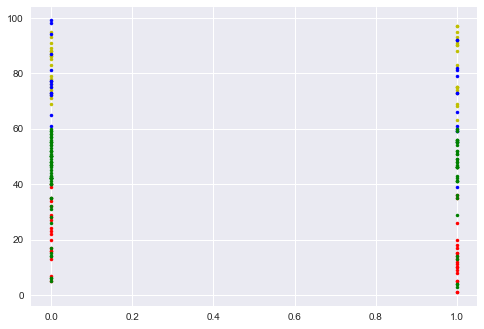

In [74]:
plt.plot(df['Gender_Bin'][df['cluster'] == 0], df['Spending_Score'][df['cluster'] == 0], 'r.')
plt.plot(df['Gender_Bin'][df['cluster'] == 1], df['Spending_Score'][df['cluster'] == 1], 'y.')
plt.plot(df['Gender_Bin'][df['cluster'] == 2], df['Spending_Score'][df['cluster'] == 2], 'b.')
plt.plot(df['Gender_Bin'][df['cluster'] == 3], df['Spending_Score'][df['cluster'] == 3], 'g.')

Contoh di atas masih menggunakan seluruh feature. Tidak ada framework teori pemasaran untuk memilih feature yang tepat. Sehingga alur analisis clustering cukup sulit dipahami. Hal ini tentu akan menyulitkan marketing team untuk mengambil insight dari hasil analisis kita. Di bawah ini, Anda akan ditugaskan untuk membuat Clustering sesuai teori pemasaran.

## Use Case : Customer segmentation
Customer segmentation adalah proses membagi-bagi pasar/konsumen ke dalam kelompok-kelompok dengan karakteristik sama. Customer segmentation dapat menjadi sebuah cara yang powerful untuk mengindetifikasi kebutuhan konsumen . Metode umum yang sering dipakai untuk segmentasi user/customer dalam adalah:

1. Demographic Information, user dikelompokkan berdasarkan gender, usia, status pernikahan, status kepemilikan rumah, atau pendidikan.
2. Geographical Information, user dikelompokkan berdasarkan domisili tempat tinggal atau tempat user bekerja.
3. Psychographics, user dikelompokkan berdasarkan kelas sosial, lifestyle, dan kepribadian.
4. Behavioral Data, user dikelompokkan berdasarkan kebiasaan mengonsumsi atau menggunakan suatu produk dan layanan.

**Manfaat Customer Segmentation** 
- Menentukan harga produk yang sesuai dengan daya beli user
- Membangun marketing campaign yang sesuai dengan karakter user
- Mendesain strategi distribusi yang optimal
- Memilih feature produk yang cocok dengan kebutuhan user
- Mampu memilih prioritas produk baru yang perlu dikembangkan

## Evaluation Metrics

In [28]:
# silhouette coefficient / koef bayangan
# standart: -1 s/d 1 => seberapa bagus model mendefinisikan cluster

metrics.silhouette_score(
    df[['Age', 'Annual_Income', 'Spending_Score', 'Gender_Bin']],
    model_KM.labels_,
    metric = 'euclidean')

0.4052954330641215

In [29]:
# Calinski-Harabasz index: variance ratio criterion
# seberapa bagus model mendefinisikan cluster
# lebih besar lebih bagus

metrics.calinski_harabasz_score(
    df[['Age', 'Annual_Income', 'Spending_Score', 'Gender_Bin']],
    model_KM.labels_
)

127.92482557839757

## Mall Customer Segmentation

**Pilihan User Segmentation**

Pada dataset di atas terdapat feature pada user yang bisa digunakan untuk user segmentation:
1. Gender (Demographic)
2. Age (Demographic)
3. Annual Income (Behavioral Data Resource)
4. Spending Socre (Behavioral Data)

Berdasarkan teori dan ketersediaan feature pada dataset, maka pilihan user segmentation: Demographic information dan Behavioral Data.

**Pertama**, user segmentation berdasarkan skor belanja dan potensi konsumen menggunakan data Annual Income dan Spending Score menggunakan Kmeans.

**Kedua**, setelah segmentasi pertama kita dapatkan cluster-cluster berdasarkan spending score dan annual income. Setelah itu tiap cluster akan dieksplorasi berdasarkan demografi user yaitu jenis kelamin (gender_user) dan usia (age_user).

In [30]:
k = range(1, 15)
inertia = []

for i in k:
    model = KMeans(n_clusters = i)
    model.fit(df[['Annual_Income', 'Spending_Score']])
    inertia.append(model.inertia_)

print(k)
print(inertia)

range(1, 15)
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30259.657207285458, 26102.94389461113, 22289.580190554116, 19669.71099830122, 17841.6046875639, 15810.343426539735, 14300.044641632878, 12797.180630643868]


Text(4, 200, 'Best k value = 4')

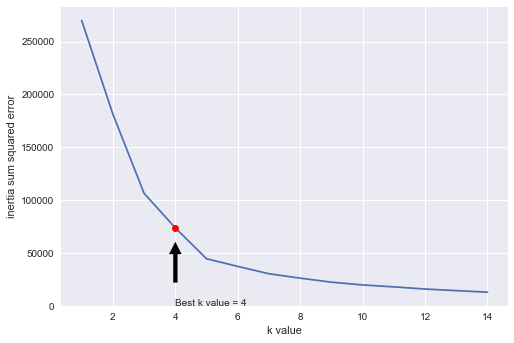

In [31]:

plt.plot(k, inertia) #melihat pada sudut siku dalam plot
plt.xlabel('k value')
plt.ylabel('inertia sum squared error')
plt.plot(k[3], inertia[3], 'ro')
plt.annotate(
    'Best k value = 4', xy=(k[3], inertia[3]),
    xytext = (4, 200), arrowprops = dict(facecolor='black', shrink=0.2)
)

In [32]:
KM_model = KMeans(n_clusters = 4, max_iter = 10000)

In [34]:
KM_model.fit(df[['Annual_Income', 'Spending_Score']])

KMeans(max_iter=10000, n_clusters=4)

In [35]:
df['Cluster2'] = KM_model.predict(df[['Annual_Income', 'Spending_Score']])

In [36]:
df.head()

,CustomerID,Age,Annual_Income,Spending_Score,Gender_Bin,cluster,Cluster2
0,1,19,15,39,1,2,3
1,2,21,15,81,1,2,0
2,3,20,16,6,0,0,3
3,4,23,16,77,0,2,0
4,5,31,17,40,0,0,3


In [37]:
# centroid
KM_model.cluster_centers_

array([[48.26      , 56.48      ],
       [86.53846154, 82.12820513],
       [87.        , 18.63157895],
       [26.30434783, 20.91304348]])

## Visualization

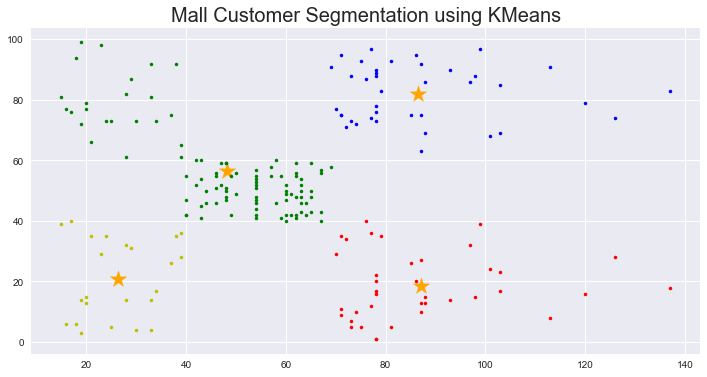

In [38]:
plt.style.use('seaborn')
plt.figure(figsize=(12, 6))
plt.scatter(
    KM_model.cluster_centers_[:, 0],
    KM_model.cluster_centers_[:, 1],
    color = 'orange', marker = '*', s = 300
)
plt.plot(df['Annual_Income'][df['Cluster2'] == 0], df['Spending_Score'][df['Cluster2'] == 0], 'g.')
plt.plot(df['Annual_Income'][df['Cluster2'] == 1], df['Spending_Score'][df['Cluster2'] == 1], 'b.')
plt.plot(df['Annual_Income'][df['Cluster2'] == 2], df['Spending_Score'][df['Cluster2'] == 2], 'r.')
plt.plot(df['Annual_Income'][df['Cluster2'] == 3], df['Spending_Score'][df['Cluster2'] == 3], 'y.')
plt.grid(True)
plt.title("Mall Customer Segmentation using KMeans", size=20)
plt.show()

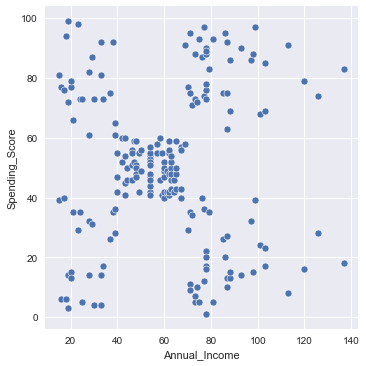

In [77]:
sns.relplot(data=df, x='Annual_Income', y='Spending_Score')

Visualisasi selanjutnya dibuat multiplot.

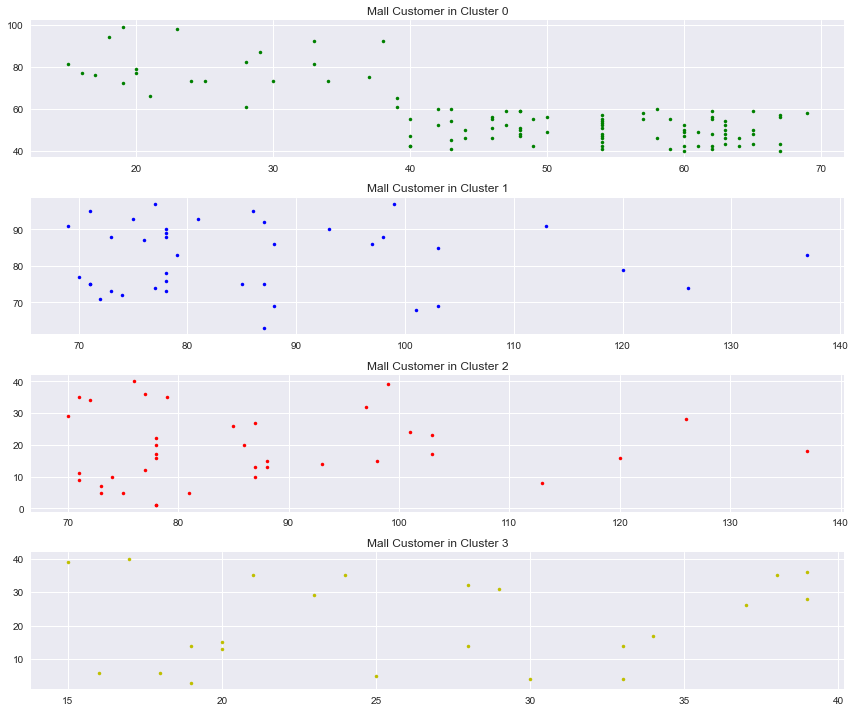

In [40]:
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(df['Annual_Income'][df['Cluster2'] == 0], df['Spending_Score'][df['Cluster2'] == 0], 'g.')
plt.title('Mall Customer in Cluster 0')
plt.subplot(412)
plt.plot(df['Annual_Income'][df['Cluster2'] == 1], df['Spending_Score'][df['Cluster2'] == 1], 'b.')
plt.title('Mall Customer in Cluster 1')
plt.subplot(413)
plt.plot(df['Annual_Income'][df['Cluster2'] == 2], df['Spending_Score'][df['Cluster2'] == 2], 'r.')
plt.title('Mall Customer in Cluster 2')
plt.subplot(414)
plt.plot(df['Annual_Income'][df['Cluster2'] == 3], df['Spending_Score'][df['Cluster2'] == 3], 'y.')
plt.title('Mall Customer in Cluster 3')
plt.tight_layout()

## Cluster Exploration using Demographic Segmentation

Setelah mendapatkan cluster 0 sampai 3, kita eksplorasi berdasarkan aspek demografiknya.

Lokasi centroid (titik tengah) pada tiap kluster dapat dilihat berikut ini:

In [41]:
KM_model.cluster_centers_

array([[48.26      , 56.48      ],
       [86.53846154, 82.12820513],
       [87.        , 18.63157895],
       [26.30434783, 20.91304348]])

Jumlah user di tiap kluster dapat dilihat di bawah ini. User di kluster 0 paling banyak, yaitu 124 user. Terbanyak kedua, yaitu user di kluster 2 sebanyak 25 user. Kluster 0 hanya diisi oleh satu user

In [42]:

df_user_cluster_0 = df[df['Cluster2'] == 0]
df_user_cluster_1 = df[df['Cluster2'] == 1]
df_user_cluster_2 = df[df['Cluster2'] == 2]
df_user_cluster_3 = df[df['Cluster2'] == 3]

In [43]:
number_uc0 = len(df_user_cluster_0['CustomerID'].unique())
number_uc1 = len(df_user_cluster_1['CustomerID'].unique())
number_uc2 = len(df_user_cluster_2['CustomerID'].unique())
number_uc3 = len(df_user_cluster_3['CustomerID'].unique())

print(f'Jumlah user di cluster 0: {number_uc0} \nJumlah user di cluster 1: {number_uc1}\nJumlah user di cluster 2: {number_uc2} \nJumlah user di cluster 3: {number_uc3}')

Jumlah user di cluster 0: 100 
Jumlah user di cluster 1: 39
Jumlah user di cluster 2: 38 
Jumlah user di cluster 3: 23


### 1. Cluster 0:

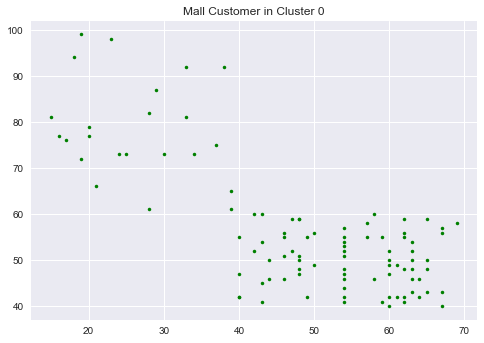

In [44]:
plt.plot(df['Annual_Income'][df['Cluster2'] == 0], df['Spending_Score'][df['Cluster2'] == 0], 'g.')
plt.title('Mall Customer in Cluster 0')
plt.show()

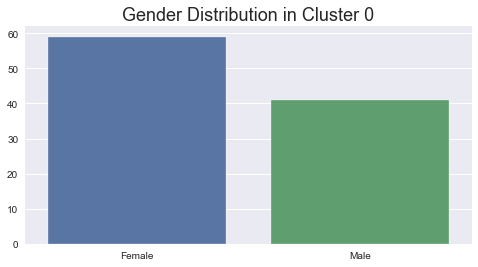

In [52]:
#Gender Distribution
genders = df_user_cluster_0['Gender_Bin'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(8,4))
sns.barplot(x=genders.index, y=genders.values)
plt.title("Gender Distribution in Cluster 0", size=18)
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.show()

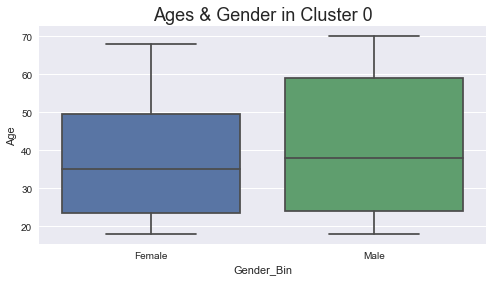

In [57]:

plt.figure(figsize=(8,4))
plt.title("Ages & Gender in Cluster 0", size=18)
sns.axes_style("dark")
ax = sns.boxplot(x="Gender_Bin", y="Age", data=df_user_cluster_0)
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.show()

In [58]:
df.head()

,CustomerID,Age,Annual_Income,Spending_Score,Gender_Bin,cluster,Cluster2
0,1,19,15,39,1,2,3
1,2,21,15,81,1,2,0
2,3,20,16,6,0,0,3
3,4,23,16,77,0,2,0
4,5,31,17,40,0,0,3


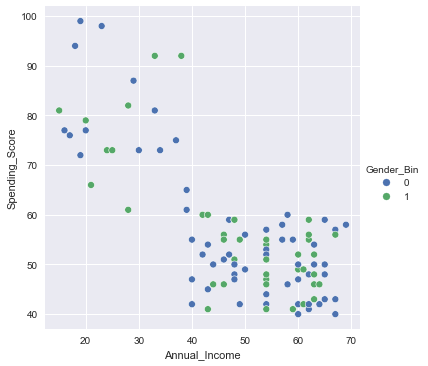

In [62]:
sns.relplot(data=df[df['Cluster2']==0], x='Annual_Income', y='Spending_Score', hue='Gender_Bin')

In [54]:
df_user_cluster_0['AgeBand'] = pd.cut(df_user_cluster_0['Age'], 3)

<ipython-input-54-2f25b3b698ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_cluster_0['AgeBand'] = pd.cut(df_user_cluster_0['Age'], 3)



Berdasarkan clustering based on behavioral data lalu dilanjutkan eksplorasi berdasarkan data-data demografik memungkinkan kita untuk mendapatkan insight lebih luas tentang user/market. Team marketing akan terbantu dengan informasi yang lebih detail terkait siapa target market yang paling potensial untuk perusahaan.

## Exercise :
- Lakukan Cluster Exploration Untuk Semua Cluster lain
- Insight apa yang dapat ditemukan dari hasil eksplorasi?

In [63]:
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

C:\Users\HP.LAPTOP-5BTBEJFV\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05)

## Reference:
- Gifa Delyani Nursyafitri, "K-Means Clustering menggunakan Python", https://medium.com/@gifadelyaninursyafitri/k-means-clustering-menggunakan-python-deeb0881333c
- Fauziyah Dewi, "K-Means Clustering with Scikit-Learn in Python", https://medium.com/@fauziyahdewi16/k-means-clustering-with-scikit-learn-in-python-b8e7835d9753
- Ryan Reza Fadillah, "Ritel K-Mean Clustering Using Python", https://medium.com/@ryanrezafadillah/ritel-k-mean-clustering-using-python-90f813b474b1
- Dileka Madushan, "Introduction to K-means Clustering", https://medium.com/@dilekamadushan/introduction-to-k-means-clustering-7c0ebc997e00
- Seema Singh, "K-Means Clustering", https://medium.com/datadriveninvestor/k-means-clustering-b89d349e98e6
- Rizky Desi Ramadhani, "Memahami K-Mean Clustering Pada Machine Learning Dengan Phyton", https://medium.com/@16611129/memahami-k-mean-clustering-pada-machine-learning-dengan-phyton-430323d80868
- Pulkit Sharma, "The Most Comprehensive Guide to K-Means Clustering You’ll Ever Need", https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
- Geeksforgeeks, "K means Clustering – Introduction", https://www.geeksforgeeks.org/k-means-clustering-introduction/
- Dr. Michael J. Garbade, "Understanding K-means Clustering in Machine Learning", https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
- Geeksforgeeks, "Clustering in Machine Learning", https://www.geeksforgeeks.org/clustering-in-machine-learning/
- Dataset source: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
- Robert Miller, "Clustering: Why to Use it", https://towardsdatascience.com/clustering-why-to-use-it-16d8e2fbafe